### Assignment Submitted by VINAY M on 06-09-2023

In [1]:
## Part 3 - EDA, Encoding and Prediction

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading CSV Dataset
df = pd.read_csv('cleanedData.csv')

In [4]:
df

,Unnamed: 0,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,cf,nopre,type1,p1,l1,nopc,nob/c,116500.0,360.0,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.000000
1,1,cf,nopre,type2,p1,l1,nopc,b/c,206500.0,360.0,...,EQUI,552.0,EXP,55-64,to_inst,72.746457,North,direct,1.0,37.732932
2,2,cf,pre,type1,p1,l1,nopc,nob/c,406500.0,360.0,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.000000
3,3,cf,nopre,type1,p4,l1,nopc,nob/c,456500.0,360.0,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.000000
4,4,cf,pre,type1,p1,l1,nopc,nob/c,696500.0,360.0,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,148665,cf,nopre,type1,p3,l1,nopc,nob/c,436500.0,180.0,...,CIB,659.0,EXP,55-64,to_inst,71.792763,south,direct,0.0,48.000000
148666,148666,cf,nopre,type1,p1,l1,nopc,nob/c,586500.0,360.0,...,CIB,569.0,CIB,25-34,not_inst,74.428934,south,direct,0.0,16.500000
148667,148667,cf,nopre,type1,p4,l1,nopc,nob/c,446500.0,180.0,...,CIB,702.0,EXP,45-54,not_inst,61.332418,North,direct,0.0,49.000000
148668,148668,cf,nopre,type1,p4,l1,nopc,nob/c,196500.0,180.0,...,EXP,737.0,EXP,55-64,to_inst,70.683453,North,direct,0.0,29.000000


In [5]:
# Drop Unnamed
df.drop('Unnamed: 0', axis=1, inplace=True)
# Checking DType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   approv_in_adv              148670 non-null  object 
 2   loan_type                  148670 non-null  object 
 3   loan_purpose               148670 non-null  object 
 4   Credit_Worthiness          148670 non-null  object 
 5   open_credit                148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  float64
 8   term                       148670 non-null  float64
 9   Neg_ammortization          148670 non-null  object 
 10  interest_only              148670 non-null  object 
 11  lump_sum_payment           148670 non-null  object 
 12  property_value             148670 non-null  float64
 13  construction_type          14

In [6]:
# Checking missing values
df.isna().sum()

loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

<Axes: >

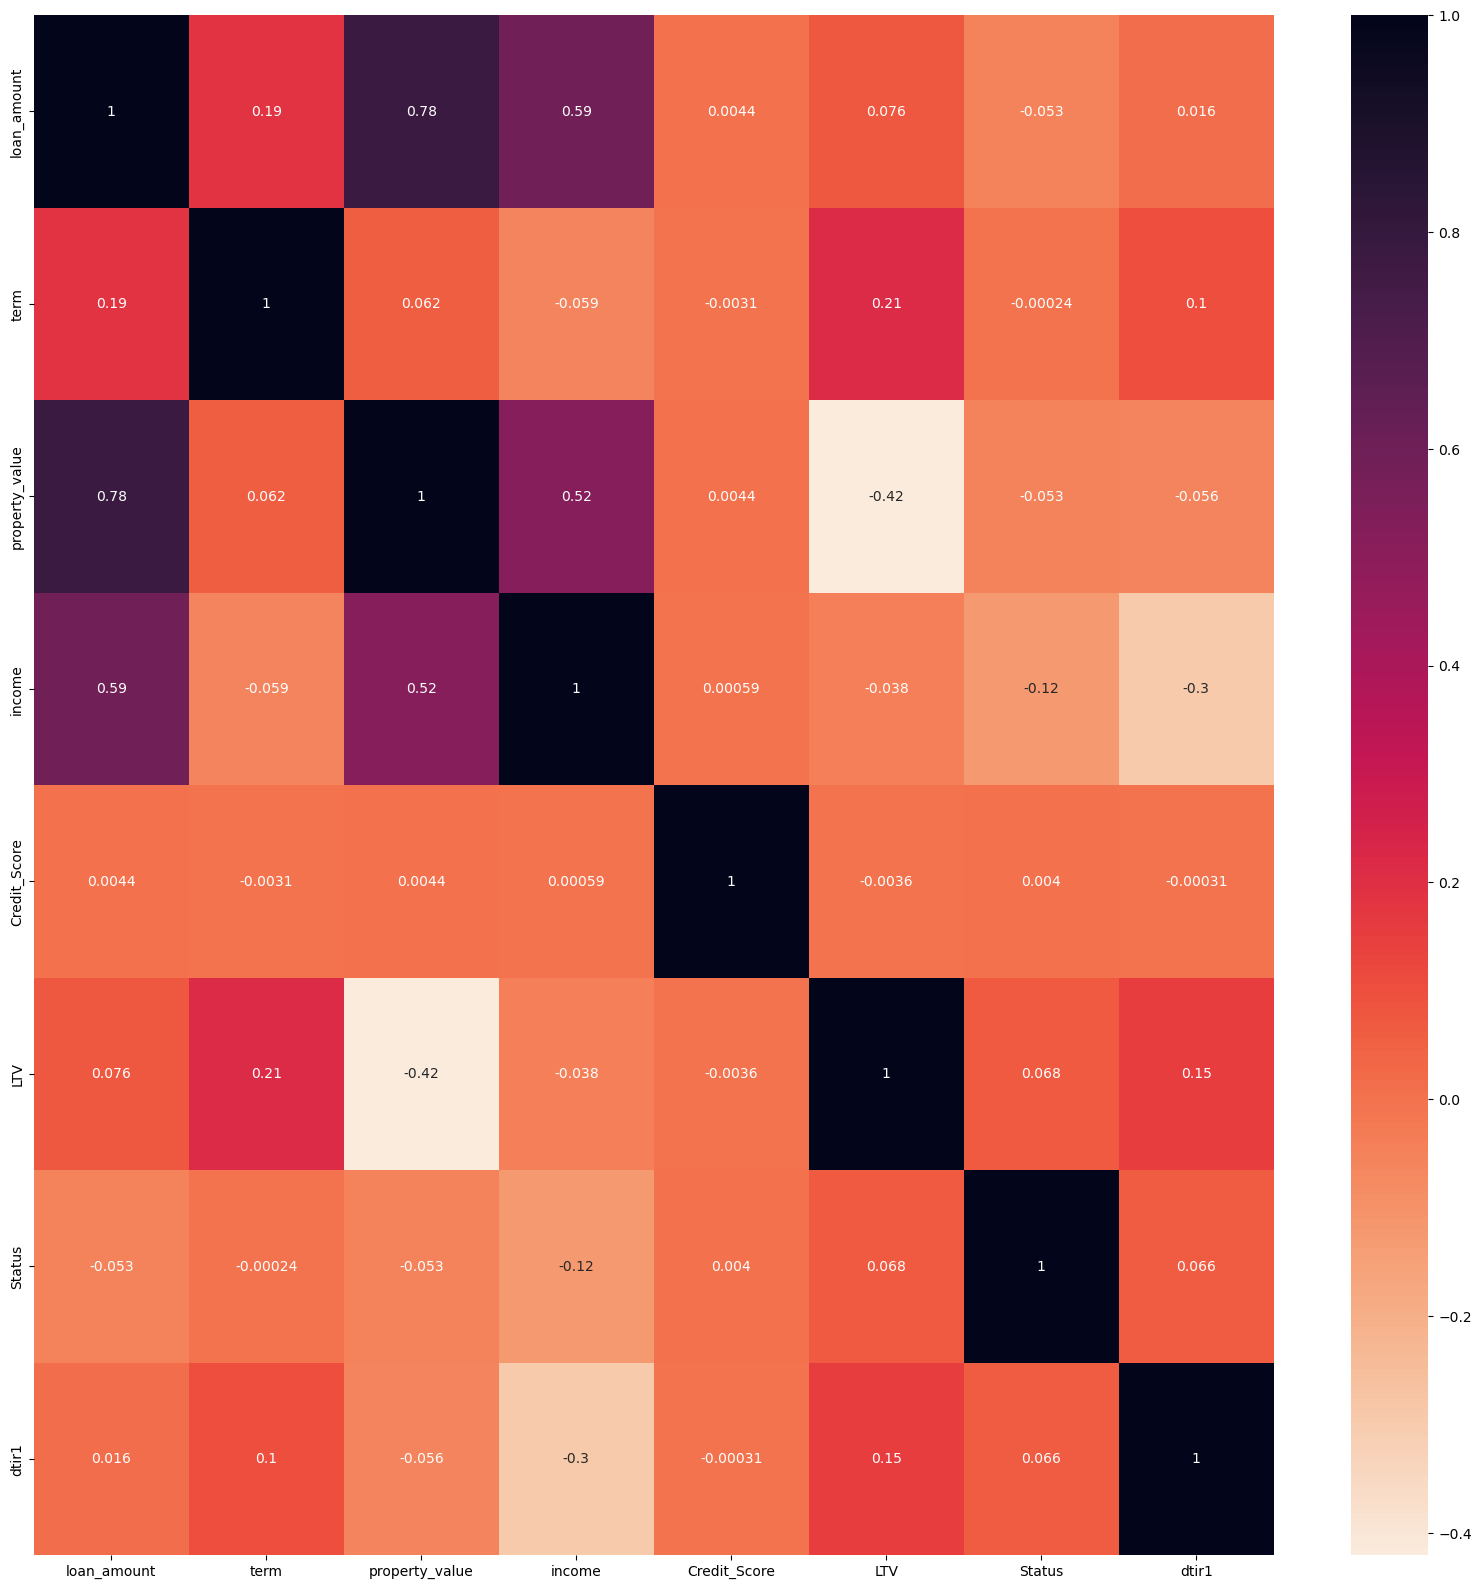

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="rocket_r")

In [15]:
# checking cardinality of categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = df[column].unique()
    cardinality = len(unique_values)
    print(f"{column}:::::: {cardinality} class------> {unique_values}")

loan_limit:::::: 2 class------> ['cf' 'ncf']
approv_in_adv:::::: 2 class------> ['nopre' 'pre']
loan_type:::::: 3 class------> ['type1' 'type2' 'type3']
loan_purpose:::::: 4 class------> ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness:::::: 2 class------> ['l1' 'l2']
open_credit:::::: 2 class------> ['nopc' 'opc']
business_or_commercial:::::: 2 class------> ['nob/c' 'b/c']
Neg_ammortization:::::: 2 class------> ['not_neg' 'neg_amm']
interest_only:::::: 2 class------> ['not_int' 'int_only']
lump_sum_payment:::::: 2 class------> ['not_lpsm' 'lpsm']
construction_type:::::: 2 class------> ['sb' 'mh']
occupancy_type:::::: 3 class------> ['pr' 'sr' 'ir']
Secured_by:::::: 2 class------> ['home' 'land']
total_units:::::: 4 class------> ['1U' '2U' '3U' '4U']
credit_type:::::: 4 class------> ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type:::::: 2 class------> ['CIB' 'EXP']
age:::::: 7 class------> ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application:::::: 2 class------> [

In [16]:
# checking balance in prediction class

In [19]:
df['Status'].value_counts()

0.0    112031
1.0     36639
Name: Status, dtype: int64

In [20]:
# There is a significant imbalance in the data, We need to balance through SMOTE Techiques 

In [21]:
# listing categorical columns
catCol = []
for col in df.select_dtypes(include=[object]).columns:
    catCol.append(col)

# One Hot encoding for the categorical classes
df_encoded = pd.get_dummies(df, columns=catCol)
df_encoded

,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,116500.0,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000,1,0,...,0,0,0,1,0,0,0,1,0,1
1,206500.0,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932,1,0,...,0,0,0,1,1,0,0,0,0,1
2,406500.0,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000,1,0,...,0,0,0,1,0,0,0,1,0,1
3,456500.0,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000,1,0,...,0,0,1,0,1,0,0,0,0,1
4,696500.0,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500.0,180.0,608000.000000,7860.0,659.0,71.792763,0.0,48.000000,1,0,...,0,0,0,1,0,0,0,1,0,1
148666,586500.0,360.0,788000.000000,7140.0,569.0,74.428934,0.0,16.500000,1,0,...,0,0,1,0,0,0,0,1,0,1
148667,446500.0,180.0,728000.000000,6900.0,702.0,61.332418,0.0,49.000000,1,0,...,0,0,1,0,1,0,0,0,0,1
148668,196500.0,180.0,278000.000000,7140.0,737.0,70.683453,0.0,29.000000,1,0,...,0,0,0,1,1,0,0,0,0,1


In [25]:
df_encoded.columns

Index(['loan_amount', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'loan_limit_cf', 'loan_limit_ncf',
       'approv_in_adv_nopre', 'approv_in_adv_pre', 'loan_type_type1',
       'loan_type_type2', 'loan_type_type3', 'loan_purpose_p1',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'Credit_Worthiness_l1', 'Credit_Worthiness_l2', 'open_credit_nopc',
       'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'total_units_1U', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI'

In [26]:
# Applying smote 

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [32]:
# Developing ML Models

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the resampled data into train and validation sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the validation set
y_pred = model.predict(X_test_resampled)
accuracy = accuracy_score(y_test_resampled, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_resampled, y_pred))

Accuracy: 0.925589836660617
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     17769
         1.0       0.98      0.87      0.92     18046

    accuracy                           0.93     35815
   macro avg       0.93      0.93      0.93     35815
weighted avg       0.93      0.93      0.93     35815



In [37]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(random_state=42)
logit_model.fit(X_train_resampled, y_train_resampled)

y_pred = logit_model.predict(X_test_resampled)
accuracy = accuracy_score(y_test_resampled, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_resampled, y_pred))

Accuracy: 0.5606868630462097
              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53     17769
         1.0       0.56      0.63      0.59     18046

    accuracy                           0.56     35815
   macro avg       0.56      0.56      0.56     35815
weighted avg       0.56      0.56      0.56     35815



In [40]:
# Random Forest Classifier Performing Better than Logistic Regression

In [41]:
# Assignment submitted by VINAY M on 06-09-2023